### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [247]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [248]:
data = pd.read_csv('data/coupons.csv')

In [249]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [250]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [251]:
data["car"].value_counts()

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64

In [252]:
data["coupon"].value_counts()

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

In [253]:
data["age"].value_counts()

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64

In [254]:
data["passanger"].value_counts()

passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64

In [255]:
data["maritalStatus"].value_counts()

maritalStatus
Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed               130
Name: count, dtype: int64

In [256]:
data["income"].value_counts()

income
$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: count, dtype: int64

In [257]:
data["RestaurantLessThan20"].value_counts()

RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

### Cleaning Data

- We found a few columns with null data, ~200-300 per column, with some overlap. We'll drop these rows, as we don't need them.
- Drop the "car" column - all but 100-ish rows are NaNs
- Can't figure out what the toCoupon_GEQ columns mean. Also, the toCoupon_GEQ5min column is all 1s, so we don't need this column anyway. Choosing to drop these columns, as we probably don't need them for future analysis if we can't figure out what they mean.
- Rename passenger column
- Match values in the coupons columns to the column names
- Replace values in "Y" column and rename column to be more human readable

In [258]:
# drop rows with null data for survey questions - small enough that we don't care
df = data.dropna(subset=["CarryAway", "CoffeeHouse", "Bar", "RestaurantLessThan20", "Restaurant20To50"])
# drop car - not enough data
# toCoupon_GEQXmin -> Can't figure out what these mean?
# toCoupon_GEQ5min -> all 1s
# drop toCoupon_GEQXmin columns
df = df.drop(columns=["car","toCoupon_GEQ5min","toCoupon_GEQ15min","toCoupon_GEQ25min"])

# rename passenger column
df = df.rename(columns={"passanger":"passenger"})

# match values in coupons column to column names
df["coupon"] = df["coupon"].replace({"Carry out & Take away":"Carry Away"})

# Create human readable values in "Accepted" column based on "Y" column
df["AcceptedCoupon"] = df["Y"].replace({0:"Declined",1:"Accepted"})

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passenger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-null  ob

In [259]:
df.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,direction_opp,Y,AcceptedCoupon
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,$62500 - $74999,never,less1,4~8,4~8,less1,0,1,1,Accepted
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,$62500 - $74999,never,less1,4~8,4~8,less1,0,1,0,Declined
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,$62500 - $74999,never,less1,4~8,4~8,less1,0,1,1,Accepted
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry Away,2h,Male,21,Single,...,$62500 - $74999,never,less1,4~8,4~8,less1,0,1,0,Declined
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,$62500 - $74999,never,less1,4~8,4~8,less1,0,1,0,Declined


4. What proportion of the total observations chose to accept the coupon? 



In [260]:
df.loc[df["Y"] == 1].shape[0] / df.shape[0]

0.5693352098683666

5. Use a bar plot to visualize the `coupon` column.

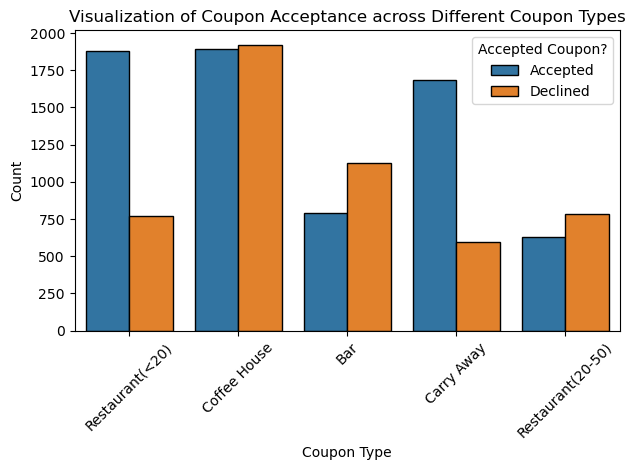

In [261]:
sns.countplot(df, x="coupon", hue="AcceptedCoupon",edgecolor="black").set_title('Visualization of Coupon Acceptance across Different Coupon Types')
plt.xlabel("Coupon Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Accepted Coupon?")
plt.tight_layout()
plt.savefig("images/coupon_acceptance.png")

6. Use a histogram to visualize the temperature column.

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


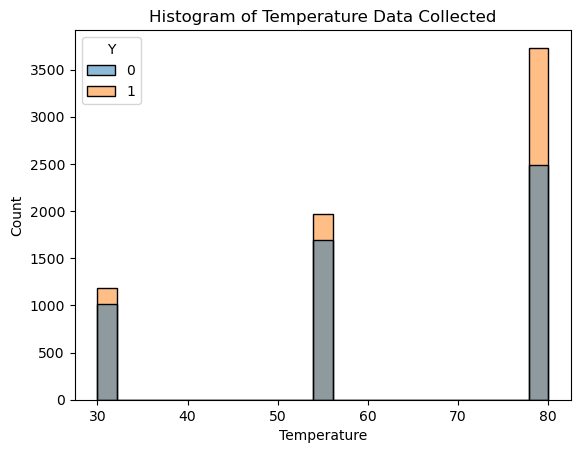

In [262]:
sns.histplot(data=df,x="temperature",hue="Y").set_title('Histogram of Temperature Data Collected')
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.savefig("images/temp_histogram.png")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [263]:
df_bar = df.loc[df["coupon"] == "Bar"]
df_bar.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,direction_opp,Y,AcceptedCoupon
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,$62500 - $74999,never,less1,4~8,4~8,less1,0,1,1,Accepted
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,1,Accepted
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,$62500 - $74999,never,less1,4~8,4~8,less1,0,1,1,Accepted
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,$12500 - $24999,never,4~8,1~3,1~3,never,0,1,0,Declined
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,$12500 - $24999,never,4~8,1~3,1~3,never,1,0,0,Declined


2. What proportion of bar coupons were accepted?


In [264]:
df_bar.loc[df_bar["Y"] == 1].shape[0] / df_bar.shape[0]

0.41191845269210664

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [265]:
df_bar["Bar"].value_counts()


Bar
never    788
less1    553
1~3      379
4~8      147
gt8       46
Name: count, dtype: int64

In [266]:
values_3_or_fewer = ["never","less1","1~3"]
df_bar_3_or_fewer = df_bar.query("Bar in @values_3_or_fewer")
df_bar_gt_3 = df_bar.query("Bar not in @values_3_or_fewer")

lt_3_proportion = df_bar_3_or_fewer.loc[df_bar_3_or_fewer["Y"] == 1].shape[0] / df_bar_3_or_fewer.shape[0]
gt_3_proportion = df_bar_gt_3.loc[df_bar_gt_3["Y"] == 1].shape[0] / df_bar_gt_3.shape[0]
print("Less than (or equal to) 3 visits: ", lt_3_proportion)
print("Greater than 3 visits: ", gt_3_proportion)

Less than (or equal to) 3 visits:  0.37267441860465117
Greater than 3 visits:  0.7616580310880829


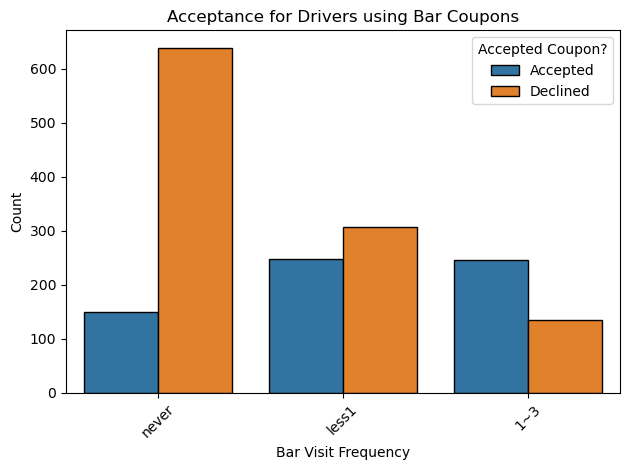

In [267]:
sns.countplot(df_bar_3_or_fewer, x="Bar", hue="AcceptedCoupon",edgecolor="black").set_title("Acceptance for Drivers using Bar Coupons")
plt.xlabel("Bar Visit Frequency")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Accepted Coupon?")
plt.tight_layout()
plt.savefig("images/coupon_acceptance_bar1.png")

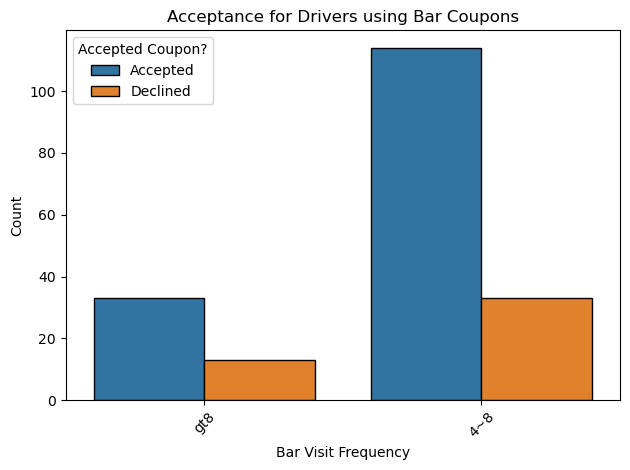

In [268]:
sns.countplot(df_bar_gt_3, x="Bar", hue="AcceptedCoupon",edgecolor="black").set_title("Acceptance for Drivers using Bar Coupons")
plt.xlabel("Bar Visit Frequency")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Accepted Coupon?")
plt.tight_layout()
plt.savefig("images/coupon_acceptance_bar2.png")

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [269]:
values_1_or_fewer = ["never","less1"]
values_age_25_or_less = ["below21","21"]
df_bar_25_plus_gt_1 = df_bar.query("Bar not in @values_1_or_fewer and age not in @values_age_25_or_less")
bar_25_plus_gt_1_proportion = df_bar_25_plus_gt_1.loc[df_bar_25_plus_gt_1["Y"] == 1].shape[0] / df_bar_25_plus_gt_1.shape[0]
print("Greater than 1 visit per month over the age of 25: ", bar_25_plus_gt_1_proportion)

Greater than 1 visit per month over the age of 25:  0.6898263027295285


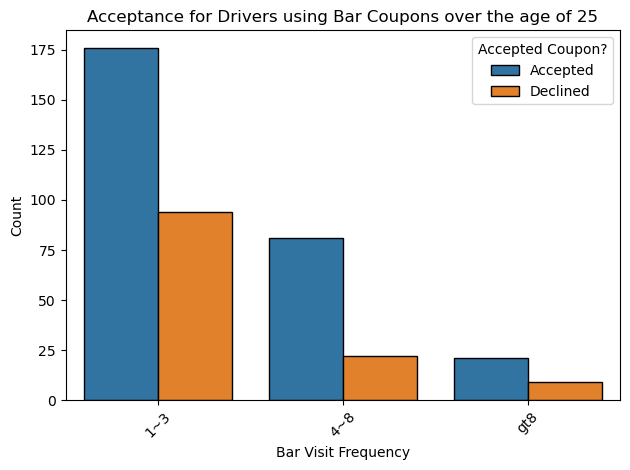

In [270]:
sns.countplot(df_bar_25_plus_gt_1, x="Bar", hue="AcceptedCoupon",edgecolor="black",order=["1~3","4~8","gt8"]).set_title("Acceptance for Drivers using Bar Coupons over the age of 25")
plt.xlabel("Bar Visit Frequency")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Accepted Coupon?")
plt.tight_layout()
plt.savefig("images/coupon_acceptance_bar_25plus.png")

There does seem to be a difference in the proportions for this demographic. Drivers who go to the bar more than once a month and are over the age of 25 are generally more inclined on average to accept a coupon over the other demographics.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [271]:
df_bar_gt_1_no_kids_no_fff = df_bar.query("Bar not in @values_1_or_fewer and passenger != 'Kid(s)' and occupation != 'Farming, Fishing & Forestry'")
bar_gt_1_no_kids_no_fff_proportion = df_bar_gt_1_no_kids_no_fff.loc[df_bar_gt_1_no_kids_no_fff["Y"] == 1].shape[0] / df_bar_gt_1_no_kids_no_fff.shape[0]
print("Greater than 1 visit per month without Kid passengers and occupations other than Farming, Fishing or Forestry: ", bar_gt_1_no_kids_no_fff_proportion)

Greater than 1 visit per month without Kid passengers and occupations other than Farming, Fishing or Forestry:  0.7094339622641509


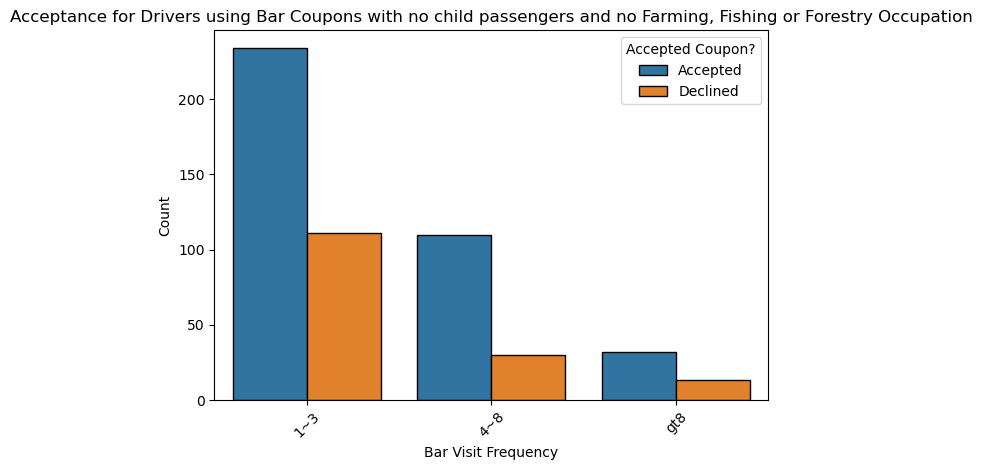

In [272]:
sns.countplot(df_bar_gt_1_no_kids_no_fff, x="Bar", hue="AcceptedCoupon",edgecolor="black",order=["1~3","4~8","gt8"]).set_title("Acceptance for Drivers using Bar Coupons with no child passengers and no Farming, Fishing or Forestry Occupation")
plt.xlabel("Bar Visit Frequency")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Accepted Coupon?")
plt.tight_layout()
plt.savefig("images/coupon_acceptance_bar_nokids1.png")

This proportion also appears to show a strong correlation between acceptance rate and the three factors mentioned in this problem (greater than 1 visit to a bar per month, passengers classified as Kid(s), and an occupation NOT in Farming, Fishing or Forestry).

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [273]:
df_bar_no_kids = df_bar.query("Bar not in @values_1_or_fewer and passenger != 'Kid(s)' and maritalStatus != 'Widowed'")
bar_no_kids_proportion = df_bar_no_kids.loc[df_bar_no_kids["Y"] == 1].shape[0] / df_bar_no_kids.shape[0]
print("Greater than 1 bar visit per month without Kid passengers and not widowed: ", bar_no_kids_proportion)

values_age_30_or_less = ["below21","21","26"]
df_bar_under_30 = df_bar.query("Bar not in @values_1_or_fewer and age in @values_age_30_or_less")
bar_under_30_proportion = df_bar_under_30.loc[df_bar_under_30["Y"] == 1].shape[0] / df_bar_under_30.shape[0]
print("Greater than 1 bar visit per month under age 30: ", bar_under_30_proportion)

values_income_50k_or_less = ["$25000 - $37499","$12500 - $24999","$37500 - $49999"]
df_cheap_rest = df.query("RestaurantLessThan20 not in @values_3_or_fewer and income in @values_income_50k_or_less")
cheap_rest_proportion = df_cheap_rest.loc[df_cheap_rest["Y"] == 1].shape[0] / df_cheap_rest.shape[0]
print("Greater than 4 cheap restaurant visit per month and less than 50k income: ", cheap_rest_proportion)


Greater than 1 bar visit per month without Kid passengers and not widowed:  0.7094339622641509
Greater than 1 bar visit per month under age 30:  0.7195121951219512
Greater than 4 cheap restaurant visit per month and less than 50k income:  0.596011396011396


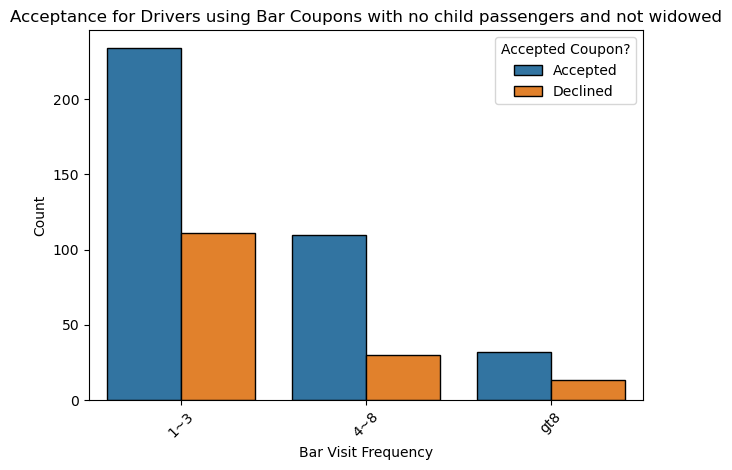

In [274]:
sns.countplot(df_bar_no_kids, x="Bar", hue="AcceptedCoupon",edgecolor="black",order=["1~3","4~8","gt8"]).set_title("Acceptance for Drivers using Bar Coupons with no child passengers and not widowed")
plt.xlabel("Bar Visit Frequency")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Accepted Coupon?")
plt.tight_layout()
plt.savefig("images/coupon_acceptance_bar_nokids2.png")

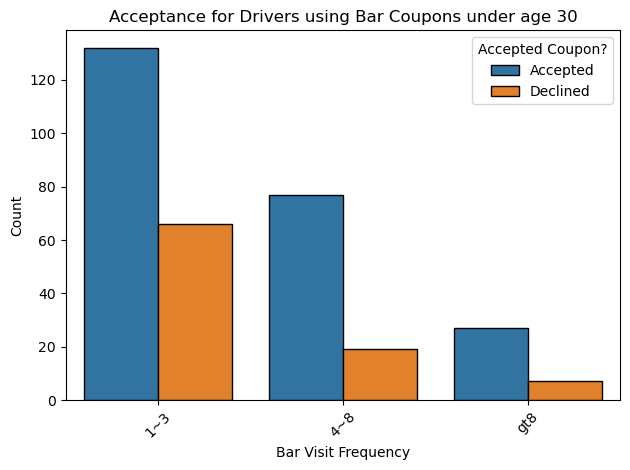

In [275]:
sns.countplot(df_bar_under_30, x="Bar", hue="AcceptedCoupon",edgecolor="black",order=["1~3","4~8","gt8"]).set_title("Acceptance for Drivers using Bar Coupons under age 30")
plt.xlabel("Bar Visit Frequency")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Accepted Coupon?")
plt.tight_layout()
plt.savefig("images/coupon_acceptance_bar_under_30.png")

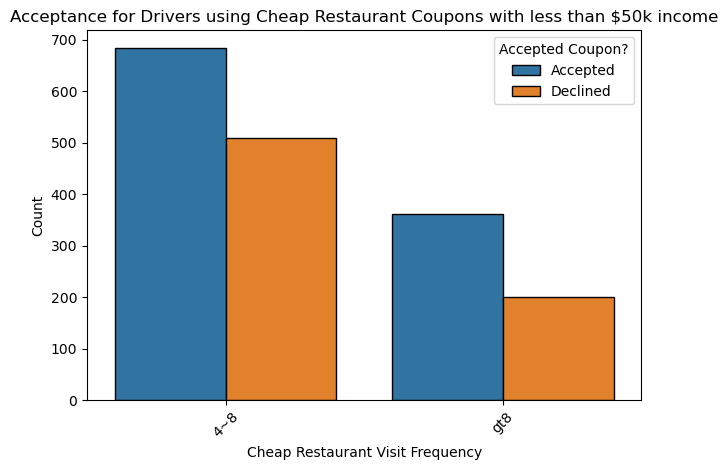

In [276]:
sns.countplot(df_cheap_rest, x="RestaurantLessThan20", hue="AcceptedCoupon",edgecolor="black",order=["4~8","gt8"]).set_title("Acceptance for Drivers using Cheap Restaurant Coupons with less than $50k income")
plt.xlabel("Cheap Restaurant Visit Frequency")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Accepted Coupon?")
plt.tight_layout()
plt.savefig("images/coupon_acceptance_restr_income_lt50k.png")

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the observations above, we can hypothesize the following:
- Frequency of visits plays a large role in whether the customer will accept the coupon - when bar visits were lower, the rate of acceptance dropped significantly.
- The younger generations appear to be accepting the bar coupons more readily than older generations, regardless of frequency.
- Drivers without kid passengers are more likely to accept the bar coupons


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### We will investigate the expensive restaurant coupons and determine what affects the acceptance rate of these coupons

In [277]:
df_exp_restr = df[df["coupon"] == "Restaurant(20-50)"]
df_exp_restr.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,direction_opp,Y,AcceptedCoupon
36,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,21,Single,...,$62500 - $74999,never,less1,4~8,4~8,less1,0,1,0,Declined
40,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Male,21,Single,...,$62500 - $74999,never,less1,4~8,4~8,less1,0,1,0,Declined
58,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,46,Single,...,$12500 - $24999,never,4~8,1~3,1~3,never,0,1,0,Declined
62,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Male,46,Single,...,$12500 - $24999,never,4~8,1~3,1~3,never,0,1,0,Declined
80,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,46,Married partner,...,$75000 - $87499,less1,1~3,1~3,1~3,less1,0,1,0,Declined


In [278]:
df_exp_restr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1417 entries, 36 to 12683
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1417 non-null   object
 1   passenger             1417 non-null   object
 2   weather               1417 non-null   object
 3   temperature           1417 non-null   int64 
 4   time                  1417 non-null   object
 5   coupon                1417 non-null   object
 6   expiration            1417 non-null   object
 7   gender                1417 non-null   object
 8   age                   1417 non-null   object
 9   maritalStatus         1417 non-null   object
 10  has_children          1417 non-null   int64 
 11  education             1417 non-null   object
 12  occupation            1417 non-null   object
 13  income                1417 non-null   object
 14  Bar                   1417 non-null   object
 15  CoffeeHouse           1417 non-null   obj

In [279]:
exp_restr_proportion = df_exp_restr.loc[df_exp_restr["Y"] == 1].shape[0] / df_exp_restr.shape[0]
print("Expensive restaurants overall acceptance rate: ",exp_restr_proportion)

Expensive restaurants overall acceptance rate:  0.44601270289343686


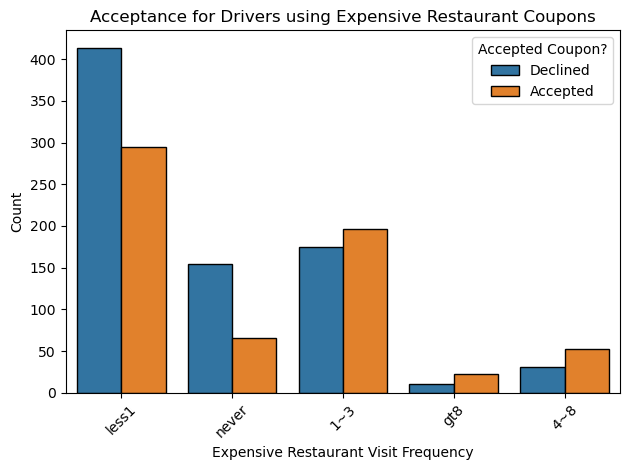

In [280]:
sns.countplot(df_exp_restr, x="Restaurant20To50", hue="AcceptedCoupon",edgecolor="black").set_title("Acceptance for Drivers using Expensive Restaurant Coupons")
plt.xlabel("Expensive Restaurant Visit Frequency")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Accepted Coupon?")
plt.tight_layout()
plt.savefig("images/coupon_acceptance_restr_income_lt50k.png")

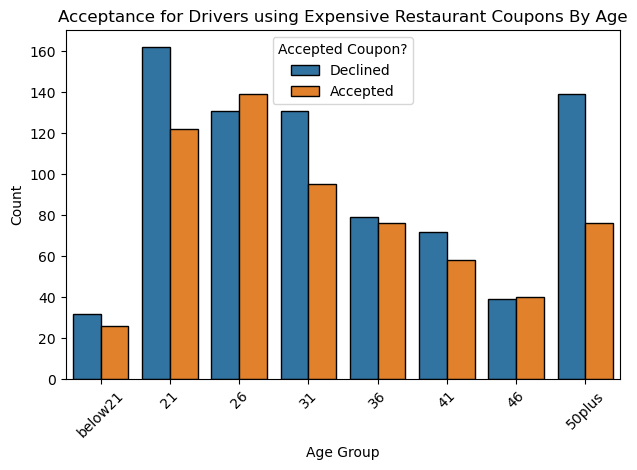

In [281]:
sns.countplot(df_exp_restr, x="age", hue="AcceptedCoupon",edgecolor="black",order=["below21","21","26","31","36","41","46","50plus"]).set_title("Acceptance for Drivers using Expensive Restaurant Coupons By Age")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Accepted Coupon?")
plt.tight_layout()
plt.savefig("images/coupon_acceptance_restr_income_lt50k.png")

In [282]:
values_age_35_or_less = ["below21","21","26","31"]
df_exp_restr_u35 = df_exp_restr.query("Restaurant20To50 not in @values_1_or_fewer and age in @values_age_35_or_less")
exp_rest_u35_proportion = df_exp_restr_u35.loc[df_exp_restr_u35["Y"] == 1].shape[0] / df_exp_restr_u35.shape[0]
print("Greater than 1 expensive restaurant visit per month under age 35: ", exp_rest_u35_proportion)

df_exp_restr_o35 = df_exp_restr.query("Restaurant20To50 not in @values_1_or_fewer and age not in @values_age_35_or_less")
exp_rest_o35_proportion = df_exp_restr_o35.loc[df_exp_restr_o35["Y"] == 1].shape[0] / df_exp_restr_o35.shape[0]
print("Greater than 1 expensive restaurant visit per month over age 35: ", exp_rest_o35_proportion)


Greater than 1 expensive restaurant visit per month under age 35:  0.5551839464882943
Greater than 1 expensive restaurant visit per month over age 35:  0.5585106382978723


While age doesn't appear to greatly correlate with acceptance rate as a group, there does seem to be a trend of greater decline rate as the driver gets older. This may indicate that there are other factors influencing this trend, such as income or occupation. Generally, people become more wealthy as they grow older, so perhaps this is just a product of increased wealth leading to fewer coupons being accepted?

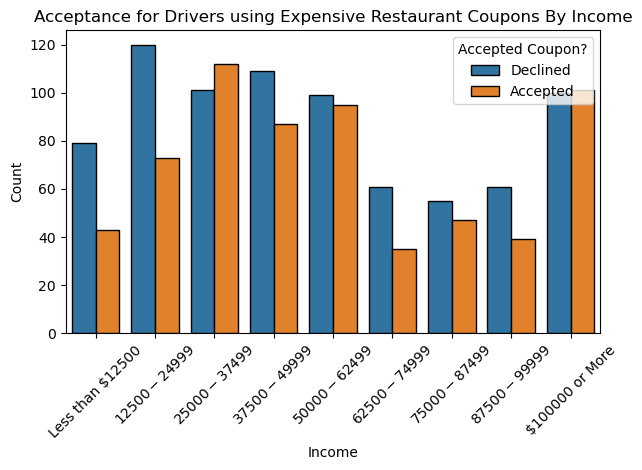

In [283]:
sns.countplot(df_exp_restr, x="income", hue="AcceptedCoupon",edgecolor="black",order=["Less than $12500","$12500 - $24999","$25000 - $37499","$37500 - $49999","$50000 - $62499","$62500 - $74999","$75000 - $87499","$87500 - $99999", "$100000 or More"]).set_title("Acceptance for Drivers using Expensive Restaurant Coupons By Income")
plt.xlabel("Income")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Accepted Coupon?")
plt.tight_layout()
plt.savefig("images/coupon_acceptance_restr_income_lt50k.png")

In [284]:
values_middle_class = ["$25000 - $37499","$37500 - $49999","$50000 - $62499"]
df_exp_restr_mc = df_exp_restr.query("income in @values_middle_class")
exp_rest_mc_proportion = df_exp_restr_mc.loc[df_exp_restr_mc["Y"] == 1].shape[0] / df_exp_restr_mc.shape[0]
print("Middle class salaries acceptance rate: ", exp_rest_mc_proportion)

df_exp_restr_nmc = df_exp_restr.query("income not in @values_middle_class")
exp_rest_nmc_proportion = df_exp_restr_nmc.loc[df_exp_restr_nmc["Y"] == 1].shape[0] / df_exp_restr_nmc.shape[0]
print("Lower and upper class salaries acceptance rate: ", exp_rest_nmc_proportion)

df_exp_restr_mc_1 = df_exp_restr.query("Restaurant20To50 not in @values_1_or_fewer and income in @values_middle_class")
exp_rest_mc_proportion_1 = df_exp_restr_mc_1.loc[df_exp_restr_mc_1["Y"] == 1].shape[0] / df_exp_restr_mc_1.shape[0]
print("Middle class salaries acceptance rate with at least 1 visit per month: ", exp_rest_mc_proportion_1)

df_exp_restr_nmc_1 = df_exp_restr.query("Restaurant20To50 not in @values_1_or_fewer and income not in @values_middle_class")
exp_rest_nmc_proportion_1 = df_exp_restr_nmc_1.loc[df_exp_restr_nmc_1["Y"] == 1].shape[0] / df_exp_restr_nmc_1.shape[0]
print("Lower and upper class salaries acceptance rate with at least 1 visit per month: ", exp_rest_nmc_proportion_1)


Middle class salaries acceptance rate:  0.48756218905472637
Lower and upper class salaries acceptance rate:  0.4152334152334152
Middle class salaries acceptance rate with at least 1 visit per month:  0.5639810426540285
Lower and upper class salaries acceptance rate with at least 1 visit per month:  0.5507246376811594


As we can see, there is a slight correlation between income and acceptance rate for expensive restaurants. Interestingly, the middle class salaries tend to have a higher acceptance rate for these coupons over the lower and upper class entries. This discrepancy grows a bit smaller when accounting for the number of visits to an expensive restaurant per month.

This may indicate that perhaps in these different income levels (lower, middle, upper) there may be a different attitude towards coupons for expensive restaurants. For example, lower income may not ever see themselves eating at an expensive restaurant, and therefore find no value in a coupon. Meanwhile, the upper bracket may not see the value in saving money with a coupon for something they can already afford, and may not want to be constrained by the coupon requirements. The middle class does not follow these characteristics, so you see a slightly higher acceptance rate for these drivers.

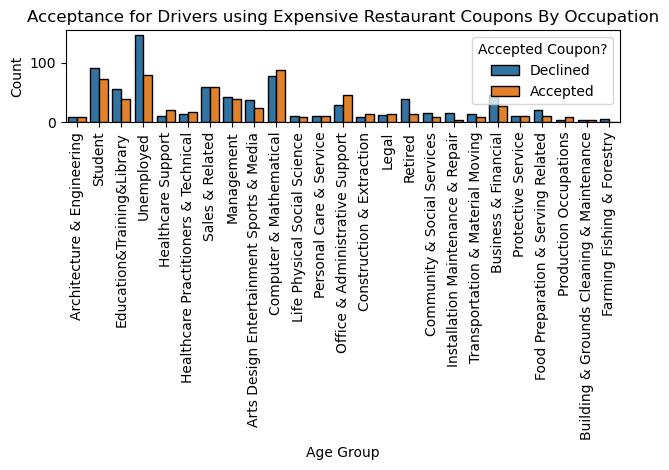

In [285]:
# sns.catplot(data=df_exp_restr,x="occupation",y="Y",kind="bar")
sns.countplot(df_exp_restr, x="occupation", hue="AcceptedCoupon",edgecolor="black").set_title("Acceptance for Drivers using Expensive Restaurant Coupons By Occupation")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title="Accepted Coupon?")
plt.tight_layout()
plt.savefig("images/coupon_acceptance_restr_income_lt50k.png")

In [286]:
values_no_industry = ["Unemployed","Student","Retired"]
df_exp_restr_unemp = df_exp_restr.query("occupation in @values_no_industry")
exp_rest_unemp_proportion = df_exp_restr_unemp.loc[df_exp_restr_unemp["Y"] == 1].shape[0] / df_exp_restr_unemp.shape[0]
print("Unemployed, retired or student acceptance rate: ", exp_rest_unemp_proportion)

df_exp_restr_emp = df_exp_restr.query("occupation not in @values_no_industry")
exp_rest_emp_proportion = df_exp_restr_emp.loc[df_exp_restr_emp["Y"] == 1].shape[0] / df_exp_restr_emp.shape[0]
print("Industry occupation acceptance rate: ", exp_rest_emp_proportion)

df_exp_restr_unemp_1 = df_exp_restr.query("Restaurant20To50 not in @values_1_or_fewer and occupation in @values_no_industry")
exp_rest_unemp_proportion_1 = df_exp_restr_unemp_1.loc[df_exp_restr_unemp_1["Y"] == 1].shape[0] / df_exp_restr_unemp_1.shape[0]
print("Unemployed, retired or student acceptance rate with at least 1 visit per month: ", exp_rest_unemp_proportion_1)

df_exp_restr_emp_1 = df_exp_restr.query("occupation not in @values_no_industry")
exp_rest_emp_proportion_1 = df_exp_restr_emp_1.loc[df_exp_restr_emp_1["Y"] == 1].shape[0] / df_exp_restr_emp_1.shape[0]
print("Industry occupation acceptance rate with at least 1 visit per month: ", exp_rest_emp_proportion_1)

print("Unemployed, retired or student total coupons: ",df_exp_restr_unemp.shape[0])
print("Unemployed, retired or student with at least 1 visit per month total coupons : ",df_exp_restr_unemp_1.shape[0])

Unemployed, retired or student acceptance rate:  0.3747178329571106
Industry occupation acceptance rate:  0.4784394250513347
Unemployed, retired or student acceptance rate with at least 1 visit per month:  0.4740740740740741
Industry occupation acceptance rate with at least 1 visit per month:  0.4784394250513347
Unemployed, retired or student total coupons:  443
Unemployed, retired or student with at least 1 visit per month total coupons :  135


Interestingly, there does seem to be a somewhat strong correlation between the occupation of drivers and their rate of acceptance for expensive restaurant coupons. For those drivers who are unemployed, retired, or students, they have a much smaller acceptance rate than those with specific industry occupations.

However, this data is skewed quite a bit when factoring in the number of visits per month. The number of unemployed, retired or student drivers goes down dramatically when you filter out those drivers that do not go to expensive restaurants at least once a month, and the acceptance rates equalize. This indicates that these drivers wouldn't accept coupons because they simply aren't going to expensive restaurants, so it doesn't make sense to market these coupons to them.

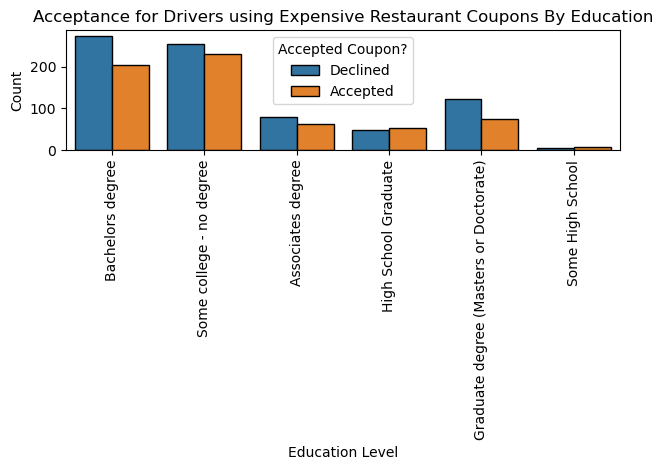

In [287]:
sns.countplot(df_exp_restr, x="education", hue="AcceptedCoupon",edgecolor="black").set_title("Acceptance for Drivers using Expensive Restaurant Coupons By Education")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title="Accepted Coupon?")
plt.tight_layout()
plt.savefig("images/coupon_acceptance_restr_income_lt50k.png")

In [288]:
values_hs = ["Some High School","High School Graduate"]
df_exp_restr_hs = df_exp_restr.query("education in @values_hs")
exp_rest_hs_proportion = df_exp_restr_hs.loc[df_exp_restr_hs["Y"] == 1].shape[0] / df_exp_restr_hs.shape[0]
print("High school education acceptance rate: ", exp_rest_hs_proportion)

df_exp_restr_c = df_exp_restr.query("income not in @values_middle_class")
exp_rest_c_proportion = df_exp_restr_c.loc[df_exp_restr_c["Y"] == 1].shape[0] / df_exp_restr_c.shape[0]
print("College education acceptance rate: ", exp_rest_c_proportion)

df_exp_restr_hs_1 = df_exp_restr.query("Restaurant20To50 not in @values_1_or_fewer and education in @values_hs")
exp_rest_hs_proportion_1 = df_exp_restr_hs_1.loc[df_exp_restr_hs_1["Y"] == 1].shape[0] / df_exp_restr_hs_1.shape[0]
print("High school education with at least 1 visit per month acceptance rate: ", exp_rest_hs_proportion_1)

df_exp_restr_c_1 = df_exp_restr.query("Restaurant20To50 not in @values_1_or_fewer and income not in @values_middle_class")
exp_rest_c_proportion_1 = df_exp_restr_c_1.loc[df_exp_restr_c_1["Y"] == 1].shape[0] / df_exp_restr_c_1.shape[0]
print("College education with at least 1 visit per month acceptance rate: ", exp_rest_c_proportion_1)


High school education acceptance rate:  0.5309734513274337
College education acceptance rate:  0.4152334152334152
High school education with at least 1 visit per month acceptance rate:  0.6521739130434783
College education with at least 1 visit per month acceptance rate:  0.5507246376811594


From these numbers, it is clear that any driver that didn't attend college for some period of time has a higher tendency to accept coupons for expensive restaurants.

## Conclusion

Based on the data provided, we can draw the following conclusions for coupon acceptance rates for restaurants that cost on average $20-$50 per person. We performed analyses to look for correlations in age, income, occupation and education to see if certain demographics tend to accept or decline these coupons.

### Age
- Expensive Restaurant coupon acceptance rate for drivers over **under** age 35 with more than 1 expensive restaurant visit per month: 0.5551839464882943
- Expensive Restaurant coupon acceptance rate for drivers over **over** age 35 with more than 1 expensive restaurant visit per month:  0.5585106382978723

There doesn't seem to be a lot of correlation when grouped together like this, but the graphs of each individual age category do show a trend where older drivers tended to decline at a higher rate. We used this conclusion to further explore related demographics, such as income, occupation and education.

### Income
- Definitions:
    - Lower: Less than $25000
    - Middle: $25000-$62499
    - Upper: More than $62500
- Middle class salaries acceptance rate:  0.48756218905472637
- Lower and upper class salaries acceptance rate:  0.4152334152334152
- Middle class salaries acceptance rate with at least 1 visit per month:  0.5639810426540285
- Lower and upper class salaries acceptance rate with at least 1 visit per month:  0.5507246376811594

As stated above, there seems to be a trend where lower and upper class drivers had lower acceptance rates than drivers in the middle class ranges. This may be explained by the social characteristics of individuals in these different income ranges (i.e. lower class tend not to go to expensive restaurants, upper class tend not to use/need coupons). There is a clear trend past the $62500 mark, but interestingly, a larger proportion of drivers making more than $100000 did have a higher acceptance rate of coupons.

There seems to be a wave-like trend in the income vs acceptance rate curves, which is very interesting, and may warrant further study.

### Occupation
- Unemployed, retired or student acceptance rate:  0.3747178329571106
- Industry occupation acceptance rate:  0.4784394250513347
- Unemployed, retired or student acceptance rate with at least 1 visit per month:  0.4740740740740741
- Industry occupation acceptance rate with at least 1 visit per month:  0.4784394250513347
- Unemployed, retired or student total coupons:  443
- Unemployed, retired or student with at least 1 visit per month total coupons :  135

Drivers who do not have occupations (in this case, unemployed, retired or students) overall tended not to accept expensive restaurant coupons at a greater rate than those with industry occupations listed. However, this discrepancy is made clearer when an additional variable for the number of visits to the expensive restaurants per month is added.

This can probably be explained by those without occupations being required to be more frugal, and so expensive restaurants are out of their budgets. This is further evidenced by the number of occupation-less drivers with at least 1 visit per month to expensive restaurants being far less than the total.

### Education
- High school education acceptance rate:  0.5309734513274337
- College education acceptance rate:  0.4152334152334152
- High school education with at least 1 visit per month acceptance rate:  0.6521739130434783
- College education with at least 1 visit per month acceptance rate:  0.5507246376811594

Similar to the Occupation section, drivers with high school as their highest education tended to accept expensive restaurant coupons more readily than those with some level of college education. This trend holds even when further enhanced with the additional variable of number of visits per month. This is the clearest trend we have seen when it comes to acceptance rate.